In [ ]:
!pip install pycaret-ts-alpha

In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
import plotly.graph_objs as go#visualization
from plotly.offline import iplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/clean_dataset.csv"
data2= pd.read_csv(path)

In [ ]:
data2.head()

,Continent,Location,Date,Total Cases,New Cases,New cases smoothed,Total deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
0,Asia,Afghanistan,2020-02-24,5,5,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
1,Asia,Afghanistan,2020-02-25,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
2,Asia,Afghanistan,2020-02-26,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
3,Asia,Afghanistan,2020-02-27,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
4,Asia,Afghanistan,2020-02-28,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83


In [ ]:
data2.isnull().sum()

Continent                                     0
Location                                      0
Date                                          0
Total Cases                                   0
New Cases                                     0
New cases smoothed                            0
Total deaths                                  0
New deaths                                    0
new deaths smoothed                           0
total cases per million                       0
new cases per million                         0
total deaths per million                      0
reproduction rate                             0
icu patients                                  0
hosp patients                                 0
hosp patients per million                     0
weekly icu admissions                         0
weekly hosp admissions                        0
new tests                                     0
total tests                                   0
new tests per thousand                  

In [ ]:
def create_and_plot_df(data2, country):
    #Selecting the 7 key columns for country in dataset
    data2=data2[data2['Location']==country].copy()
    data2=data2[['Date','Total Cases','New Cases',
         'Total deaths','New deaths',
         'people vaccinated per hundred', 'people fully vaccinated per hundred',
          'new cases per million']].copy()

    #Convert to datetime
    #data2.date = pd.to_datetime(data2['Date'])
    data2['Date'] = pd.DatetimeIndex(data2['Date'])
    return data2

In [ ]:
data2_us=create_and_plot_df(data2, 'United States')

In [ ]:
data2_us=data2_us.loc[:,['Date','New Cases']]
data2_us=data2_us.set_index('Date')

In [ ]:
data2_us.head()

,New Cases
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,1
2020-01-25,0
2020-01-26,3


In [ ]:
data2_us.tail()

,New Cases
Date,
2022-03-01,47031
2022-03-02,52355
2022-03-03,52292
2022-03-04,54501
2022-03-05,15217


In [ ]:
import plotly.express as px

In [ ]:
#data2_uk.plot(figsize=(20,8))
fig1= px.line(data2_us, template = 'plotly_dark',title='New cases over the time in USA')
fig1.show()

In [ ]:
!pip3 install numpy scipy patsy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.time_series import *
setup(data2_us, fh = 7, fold = 3, session_id = 123)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: c771
INFO:logs:self.variable_keys: {'fold_groups_param_full', 'X_train', 'fh', 'experiment__', 'exp_id', 'X_test', '_all_models_internal', 'display_container', 'data', 'USI', 'y', 'index_type', '_all_models', 'y_test', '_available_plots', 'memory', 'y_train', '_all_metrics', 'exp_name_log', 'log_plots_param', 'approach_type', '_gpu_n_jobs_param', 'logging_param', 'exogenous_present', 'enforce_exogenous', 'variable_keys', 'seasonal_period', '_ml_usecase', 'pipeline', 'X_transformed', 'fold_param', 'master_model_container', 'enforce_pi', 'X', 'seed', 'html_param', 'n_jobs_param', 'primary_sp_to_use', 'seasonality_present', 'idx', 'fold_generator', 'all_sp_values', 'gpu_param', 'y_test_transformed', 'X_train_transformed', 'X_test_transformed', 'y_transformed', 'strictly_positive', 'y_train_t

,Description,Value
0,session_id,123
1,Target,New Cases
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(774, 1)"
5,Train data shape,"(767, 1)"
6,Test data shape,"(7, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.42s...............


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

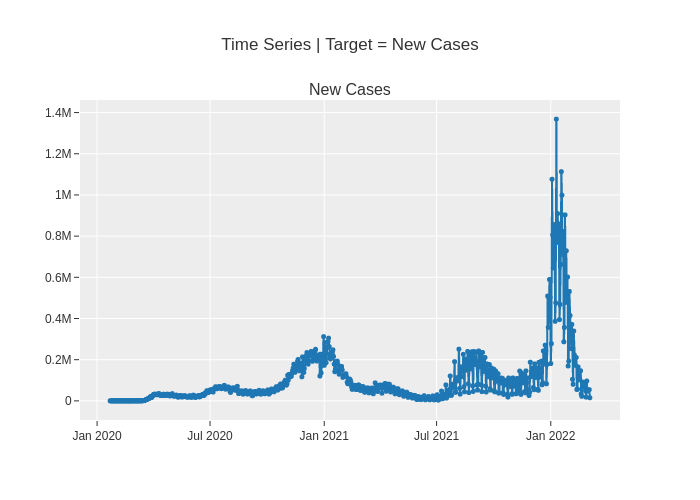

INFO:logs:Visual Rendered Successfully


NameError: ignored

In [ ]:
plot_model(plot='ts')
px.line(plot_model(plot='ts'), template = 'plotly_dark')


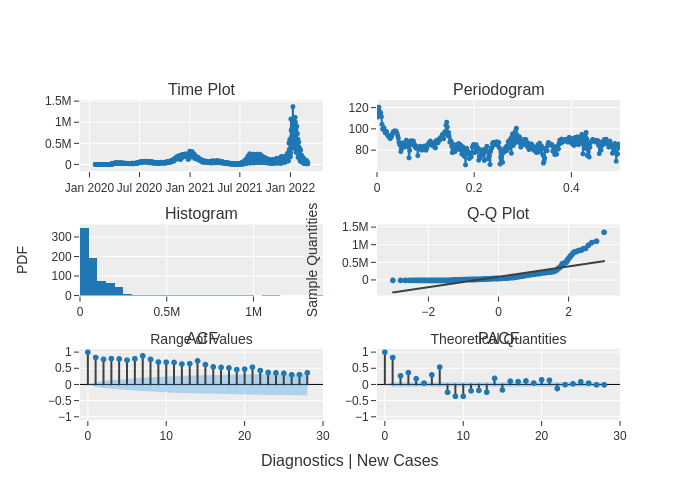

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot='diagnostics')

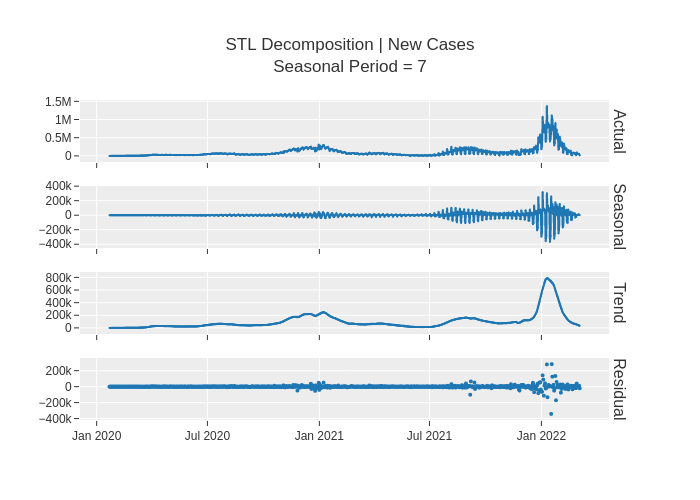

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot = 'decomp_stl')

In [ ]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
grand_means,Grand Means Forecaster,56705.0267,67793.5742,0.6592,0.4954,2.2053,0.9822,-1.1492,0.0167
arima,ARIMA,80924.7666,91281.3796,0.6924,0.4998,3.1437,1.3211,-2.7269,0.1567
snaive,Seasonal Naive Forecaster,83596.0476,93429.0518,0.7383,0.5234,3.2469,1.3522,-2.9157,0.0200
theta,Theta Forecaster,72477.4472,84650.7497,1.07,0.5252,2.8183,1.2258,-2.0019,0.0400
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,83692.9305,89246.11,0.7842,0.5347,3.2517,1.2919,-2.4992,0.1200
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,75496.6154,82720.0145,0.9321,0.5374,2.9349,1.1983,-1.9041,0.1200
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,84653.5806,89086.4341,0.815,0.544,3.2964,1.2909,-2.1969,0.2233
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,78507.7164,81610.3958,0.834,0.5446,3.0473,1.1811,-2.0667,0.1100
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,78507.7164,81610.3958,0.834,0.5446,3.0473,1.1811,-2.0667,0.1067
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,78507.7164,81610.3958,0.834,0.5446,3.0473,1.1811,-2.0667,0.1067


INFO:logs:master_model_container: 27
INFO:logs:display_container: 2
INFO:logs:NaiveForecaster(strategy='mean')
INFO:logs:compare_models() successfully completed......................................


In [ ]:
best = compare_models(sort = 'MAE')

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
auto_arima,Auto ARIMA,41972.0731,49027.0986,0.5714,0.7287,1.6267,0.7095,-0.2479,51.1733
grand_means,Grand Means Forecaster,56705.0267,67793.5742,0.6592,0.4954,2.2053,0.9822,-1.1492,0.0200
naive,Naive Forecaster,63418.4286,74088.5199,0.5191,0.648,2.4609,1.0726,-1.4476,0.0167
ets,ETS,70810.3874,91442.4411,1.1078,0.7807,2.7357,1.3223,-3.6418,0.0667
theta,Theta Forecaster,72477.4472,84650.7497,1.07,0.5252,2.8183,1.2258,-2.0019,0.0467
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,75496.6154,82720.0145,0.9321,0.5374,2.9349,1.1983,-1.9041,0.1267
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,78418.4902,81439.1901,0.8376,0.5456,3.0436,1.1786,-2.0613,0.1100
exp_smooth,Exponential Smoothing,78499.4899,114913.4281,1.4652,0.7393,3.0254,1.6599,-7.6402,0.4600
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,78504.2794,81598.2229,0.8343,0.5447,3.0471,1.1809,-2.0672,0.1067
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,78507.7164,81610.3958,0.834,0.5446,3.0473,1.1811,-2.0667,0.1067


INFO:logs:master_model_container: 54
INFO:logs:display_container: 4
INFO:logs:AutoARIMA(random_state=123, sp=7, suppress_warnings=True)
INFO:logs:compare_models() successfully completed......................................


In [ ]:
prophet=create_model('prophet')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2022-02-05,155986.7677,171771.4402,1.5008,0.6855,6.1881,2.5059,-2.8488
1,2022-02-12,202761.8596,204844.9154,2.7102,1.0237,7.7358,2.9438,-21.7462
2,2022-02-19,209014.4666,209418.2959,3.8451,1.2422,7.8352,2.9999,-87.1194
Mean,NaT,189254.3646,195344.8839,2.6854,0.9838,7.2530,2.8165,-37.2381
SD,NaT,23661.8332,16773.1807,0.9573,0.2290,0.7541,0.2208,36.1052


INFO:logs:master_model_container: 55
INFO:logs:display_container: 8
INFO:logs:ProphetPeriodPatched()
INFO:logs:create_model() successfully completed......................................


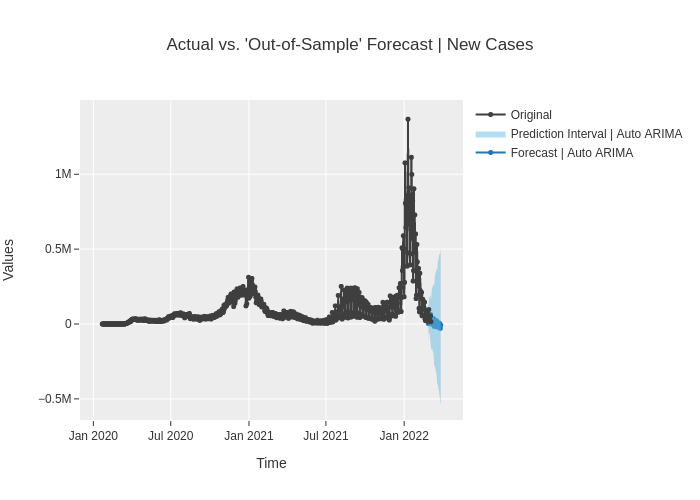

INFO:logs:Visual Rendered Successfully


In [ ]:
# forecast in unknown future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

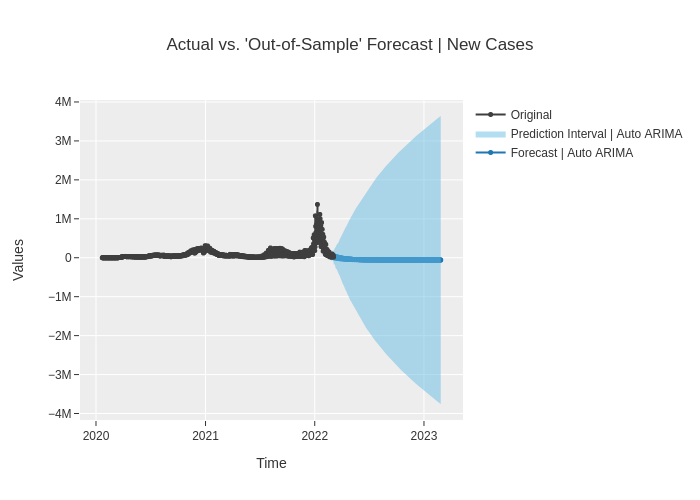

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 365})

In [ ]:
# finalize model
final_best = finalize_model(best)
# generate predictions
predict_model(final_best, fh = 365)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7f19d8588370>, estimator=AutoARIMA(random_state=123, sp=7, suppress_warnings=True), fit_kwargs=None, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing AutoARIMA(random_state=123, sp=7, suppress_warnings=True)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7f19d8588370>, estimator=AutoARIMA(random_state=123, sp=7, suppress_warnings=True), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Decl

,y_pred
2022-03-06,17131.8562
2022-03-07,54289.8711
2022-03-08,34661.4885
2022-03-09,31190.9133
2022-03-10,28655.9493
...,...
2023-03-01,-63431.8106
2023-03-02,-63431.8894
2023-03-03,-63431.7889
2023-03-04,-63432.7580


In [ ]:
# save the model
save_model(final_best, 'my_best_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=BaseCdsDtForecaster(regressor=HuberRegressor(), sp=7, window_length=7), model_name=my_best_model, prep_pipe_=None, verbose=True, use_case=MLUsecase.TIME_SERIES, kwargs={})
INFO:logs:Adding model into prep_pipe
INFO:logs:my_best_model.pkl saved in current working directory
INFO:logs:BaseCdsDtForecaster(regressor=HuberRegressor(), sp=7, window_length=7)
INFO:logs:save_model() successfully completed......................................


Transformation Pipeline and Model Successfully Saved


(BaseCdsDtForecaster(regressor=HuberRegressor(), sp=7, window_length=7),
 'my_best_model.pkl')

In [ ]:
print("my_best_model")

In [ ]:
index,y_pred
2022-03-06,17131.8562
2022-03-07,54289.8711
2022-03-08,34661.4885
2022-03-09,31190.9133
2022-03-10,28655.9493
2022-03-11,32009.7989
2022-03-12,6542.2645
2022-03-13,-5668.4863
2022-03-14,40502.3381
2022-03-15,12156.8088
2022-03-16,14878.1931
2022-03-17,12637.4428
2022-03-18,14891.269
2022-03-19,-8808.9935
2022-03-20,-11884.8623
2022-03-21,17181.0868
2022-03-22,1283.8346
2022-03-23,-368.0298
2022-03-24,-1356.9133
2022-03-25,498.8203
2022-03-26,-17542.1258
2022-03-27,-23514.1269
2022-03-28,4934.1684
2022-03-29,-12302.9121
2022-03-30,-11077.9337
2022-03-31,-12768.0893
2022-04-01,-11071.3665
2022-04-02,-26493.3243
2022-04-03,-29642.9001
2022-04-04,-8872.4498
2022-04-05,-20544.1141
2022-04-06,-21184.4543
2022-04-07,-21848.3079
2022-04-08,-20686.9125
2022-04-09,-32936.7895
2022-04-10,-36388.8101
2022-04-11,-18084.1371
2022-04-12,-28995.9263
2022-04-13,-28505.3227
2022-04-14,-29571.5072
2022-04-15,-28415.1148
2022-04-16,-38643.467
2022-04-17,-41017.2463
2022-04-18,-26745.0928
2022-04-19,-34905.3917
2022-04-20,-35115.5896
2022-04-21,-35630.4543
2022-04-22,-34849.2306
2022-04-23,-43082.2074
2022-04-24,-45258.1011
2022-04-25,-33219.7254
2022-04-26,-40314.5789
2022-04-27,-40124.9019
2022-04-28,-40778.9485
2022-04-29,-40019.4775
2022-04-30,-46836.7012
2022-05-01,-48490.17
2022-05-02,-38840.2183
2022-05-03,-44410.2418
2022-05-04,-44465.7269
2022-05-05,-44853.2715
2022-05-06,-44316.0543
2022-05-07,-49835.1422
2022-05-08,-51256.6897
2022-05-09,-43262.0321
2022-05-10,-47943.685
2022-05-11,-47867.8836
2022-05-12,-48275.665
2022-05-13,-47780.3417
2022-05-14,-52330.1822
2022-05-15,-53453.2302
2022-05-16,-46971.2076
2022-05-17,-50730.3877
2022-05-18,-50737.4542
2022-05-19,-51015.9233
2022-05-20,-50647.193
2022-05-21,-54343.8531
2022-05-22,-55285.1785
2022-05-23,-49954.3328
2022-05-24,-53066.1708
2022-05-25,-53032.892
2022-05-26,-53293.3818
2022-05-27,-52968.8627
2022-05-28,-56007.2775
2022-05-29,-56763.3903
2022-05-30,-52420.7609
2022-05-31,-54944.7819
2022-06-01,-54939.5381
2022-06-02,-55133.2621
2022-06-03,-54882.1647
2022-06-04,-57356.9213
2022-06-05,-57983.467
2022-06-06,-54422.9942
2022-06-07,-56498.351
2022-06-08,-56481.7509
2022-06-09,-56651.4087
2022-06-10,-56437.3502
2022-06-11,-58467.3084
2022-06-12,-58974.6461
2022-06-13,-56068.3703
2022-06-14,-57759.2146
2022-06-15,-57752.5254
2022-06-16,-57884.7643
2022-06-17,-57714.9808
2022-06-18,-59371.0835
2022-06-19,-59789.0254
2022-06-20,-57409.3922
2022-06-21,-58795.5582
2022-06-22,-58786.2395
2022-06-23,-58898.1098
2022-06-24,-58756.1318
2022-06-25,-60112.7949
2022-06-26,-60452.6861
2022-06-27,-58508.5227
2022-06-28,-59640.0989
2022-06-29,-59634.6318
2022-06-30,-59723.9792
2022-07-01,-59609.7321
2022-07-02,-60717.6781
2022-07-03,-60996.7706
2022-07-04,-59405.8999
2022-07-05,-60332.3458
2022-07-06,-60326.6678
2022-07-07,-60400.9472
2022-07-08,-60306.4344
2022-07-09,-61213.3327
2022-07-10,-61440.86
2022-07-11,-60140.5492
2022-07-12,-60897.5159
2022-07-13,-60893.5518
2022-07-14,-60953.602
2022-07-15,-60876.9486
2022-07-16,-61618.0327
2022-07-17,-61804.5161
2022-07-18,-60740.8268
2022-07-19,-61360.1946
2022-07-20,-61356.5695
2022-07-21,-61406.068
2022-07-22,-61343.0175
2022-07-23,-61949.3491
2022-07-24,-62101.5891
2022-07-25,-61231.9809
2022-07-26,-61738.2565
2022-07-27,-61735.5096
2022-07-28,-61775.7637
2022-07-29,-61724.4167
2022-07-30,-62220.0562
2022-07-31,-62344.7033
2022-08-01,-61633.4549
2022-08-02,-62047.5812
2022-08-03,-62045.211
2022-08-04,-62078.2554
2022-08-05,-62036.1444
2022-08-06,-62441.5601
2022-08-07,-62543.3979
2022-08-08,-61961.8558
2022-08-09,-62300.4343
2022-08-10,-62298.5671
2022-08-11,-62325.5168
2022-08-12,-62291.151
2022-08-13,-62622.614
2022-08-14,-62705.9459
2022-08-15,-62230.3463
2022-08-16,-62507.2591
2022-08-17,-62505.6913
2022-08-18,-62527.7705
2022-08-19,-62499.6277
2022-08-20,-62770.717
2022-08-21,-62838.829
2022-08-22,-62449.9374
2022-08-23,-62676.3568
2022-08-24,-62675.0984
2022-08-25,-62693.13
2022-08-26,-62670.1395
2022-08-27,-62891.7999
2022-08-28,-62947.5172
2022-08-29,-62629.4865
2022-08-30,-62814.6545
2022-08-31,-62813.6117
2022-09-01,-62828.3705
2022-09-02,-62809.5568
2022-09-03,-62990.8311
2022-09-04,-63036.3824
2022-09-05,-62776.3241
2022-09-06,-62927.7357
2022-09-07,-62926.891
2022-09-08,-62938.9521
2022-09-09,-62923.5749
2022-09-10,-63071.8039
2022-09-11,-63109.0598
2022-09-12,-62896.3926
2022-09-13,-63020.2138
2022-09-14,-63019.5184
2022-09-15,-63029.3858
2022-09-16,-63016.8068
2022-09-17,-63138.0245
2022-09-18,-63168.4865
2022-09-19,-62994.5824
2022-09-20,-63095.8335
2022-09-21,-63095.2676
2022-09-22,-63103.334
2022-09-23,-63093.0501
2022-09-24,-63192.1729
2022-09-25,-63217.0853
2022-09-26,-63074.874
2022-09-27,-63157.6734
2022-09-28,-63157.209
2022-09-29,-63163.8068
2022-09-30,-63155.3958
2022-10-01,-63236.4543
2022-10-02,-63256.825
2022-10-03,-63140.5336
2022-10-04,-63208.2414
2022-10-05,-63207.8625
2022-10-06,-63213.257
2022-10-07,-63206.3797
2022-10-08,-63272.6641
2022-10-09,-63289.323
2022-10-10,-63194.2255
2022-10-11,-63249.5938
2022-10-12,-63249.2835
2022-10-13,-63253.6953
2022-10-14,-63248.071
2022-10-15,-63302.2752
2022-10-16,-63315.8974
2022-10-17,-63238.1324
2022-10-18,-63283.4092
2022-10-19,-63283.1557
2022-10-20,-63286.7631
2022-10-21,-63282.1642
2022-10-22,-63326.4891
2022-10-23,-63337.6289
2022-10-24,-63274.0367
2022-10-25,-63311.0618
2022-10-26,-63310.8543
2022-10-27,-63313.8044
2022-10-28,-63310.0435
2022-10-29,-63346.2902
2022-10-30,-63355.3995
2022-10-31,-63303.3974
2022-11-01,-63333.6744
2022-11-02,-63333.5049
2022-11-03,-63335.9172
2022-11-04,-63332.8418
2022-11-05,-63362.4823
2022-11-06,-63369.9315
2022-11-07,-63327.4069
2022-11-08,-63352.1658
2022-11-09,-63352.0271
2022-11-10,-63353.9999
2022-11-11,-63351.4849
2022-11-12,-63375.7233
2022-11-13,-63381.8148
2022-11-14,-63347.0406
2022-11-15,-63367.2871
2022-11-16,-63367.1737
2022-11-17,-63368.7869
2022-11-18,-63366.7303
2022-11-19,-63386.5511
2022-11-20,-63391.5324
2022-11-21,-63363.096
2022-11-22,-63379.6524
2022-11-23,-63379.5597
2022-11-24,-63380.8789
2022-11-25,-63379.1971
2022-11-26,-63395.4055
2022-11-27,-63399.4789
2022-11-28,-63376.2252
2022-11-29,-63389.7641
2022-11-30,-63389.6883
2022-12-01,-63390.767
2022-12-02,-63389.3918
2022-12-03,-63402.6461
2022-12-04,-63405.9771
2022-12-05,-63386.9615
2022-12-06,-63398.0329
2022-12-07,-63397.9709
2022-12-08,-63398.853
2022-12-09,-63397.7284
2022-12-10,-63408.5671
2022-12-11,-63411.291
2022-12-12,-63395.7411
2022-12-13,-63404.7947
2022-12-14,-63404.744
2022-12-15,-63405.4653
2022-12-16,-63404.5457
2022-12-17,-63413.4089
2022-12-18,-63415.6364
2022-12-19,-63402.9205
2022-12-20,-63410.3241
2022-12-21,-63410.2826
2022-12-22,-63410.8725
2022-12-23,-63410.1205
2022-12-24,-63417.3684
2022-12-25,-63419.1899
2022-12-26,-63408.7915
2022-12-27,-63414.8457
2022-12-28,-63414.8118
2022-12-29,-63415.2942
2022-12-30,-63414.6792
2022-12-31,-63420.6061
2023-01-01,-63422.0957
2023-01-02,-63413.5925
2023-01-03,-63418.5433
2023-01-04,-63418.5155
2023-01-05,-63418.91
2023-01-06,-63418.4071
2023-01-07,-63423.2538
2023-01-08,-63424.4719
2023-01-09,-63417.5184
2023-01-10,-63421.5669
2023-01-11,-63421.5442
2023-01-12,-63421.8668
2023-01-13,-63421.4556
2023-01-14,-63425.4189
2023-01-15,-63426.415
2023-01-16,-63420.7288
2023-01-17,-63424.0395
2023-01-18,-63424.0209
2023-01-19,-63424.2847
2023-01-20,-63423.9484
2023-01-21,-63427.1895
2023-01-22,-63428.004
2023-01-23,-63423.3542
2023-01-24,-63426.0614
2023-01-25,-63426.0463
2023-01-26,-63426.262
2023-01-27,-63425.987
2023-01-28,-63428.6373
2023-01-29,-63429.3034
2023-01-30,-63425.501
2023-01-31,-63427.7149
2023-02-01,-63427.7025
2023-02-02,-63427.8788
2023-02-03,-63427.654
2023-02-04,-63429.8213
2023-02-05,-63430.3659
2023-02-06,-63427.2566
2023-02-07,-63429.0669
2023-02-08,-63429.0568
2023-02-09,-63429.201
2023-02-10,-63429.0171
2023-02-11,-63430.7894
2023-02-12,-63431.2349
2023-02-13,-63428.6922
2023-02-14,-63430.1726
2023-02-15,-63430.1643
2023-02-16,-63430.2823
2023-02-17,-63430.1319
2023-02-18,-63431.5812
2023-02-19,-63431.9454
2023-02-20,-63429.8661
2023-02-21,-63431.0767
2023-02-22,-63431.07
2023-02-23,-63431.1664
2023-02-24,-63431.0435
2023-02-25,-63432.2286
2023-02-26,-63432.5264
2023-02-27,-63430.8261
2023-02-28,-63431.8161
2023-03-01,-63431.8106
2023-03-02,-63431.8894
2023-03-03,-63431.7889
2023-03-04,-63432.758
2023-03-05,-63433.0016